In [1]:
import pandas as pd
import numpy as np

In [2]:
#df_AMEX = pd.read_csv('Data/AMEX_01071962_31121999_with_out_shares.csv')
#df_NYSE = pd.read_csv('Data/NYSE_01071962_31121999_with_out_shares.csv')

# Are these all common shares? Hard to tell if there are any preference shares involved. Possibly share class might say but this usually means it is common

#df_AMEX_NYSE = pd.concat([df_AMEX, df_NYSE], axis=0)

In [3]:
df_AMEX = pd.read_csv("C:\\Users\\david\\Documents\\Portfolio Management\\CW\\AMEX_01071962_31121999_with_out_shares.csv")
df_NYSE = pd.read_csv("C:\\Users\\david\\Documents\\Portfolio Management\\CW\\NYSE_01071962_31121999_with_out_shares.csv")

# Are these all common shares? Hard to tell if there are any preference shares involved. Possibly share class might say but this usually means it is common

df_AMEX=df_AMEX[df_AMEX['date']<'1970-01-01']
df_NYSE=df_NYSE[df_NYSE['date']<'1970-01-01']

df_AMEX_NYSE = pd.concat([df_AMEX, df_NYSE], axis=0)

C:\Users\david\AppData\Local\Temp\ipykernel_19572\2741277262.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_NYSE = pd.read_csv("C:\\Users\\david\\Documents\\Portfolio Management\\CW\\NYSE_01071962_31121999_with_out_shares.csv")


In [4]:
#there are a number of NA's where no price,volume or return data is available
df_AMEX_NYSE=df_AMEX_NYSE.dropna()

In [5]:
# Remove rows from df where return value was C
df_AMEX_NYSE = df_AMEX_NYSE[df_AMEX_NYSE['RET'] != 'C']

df_AMEX_NYSE

,PERMNO,date,EXCHCD,COMNAM,PRC,VOL,RET,SHROUT
59654,10938,1965-03-11,2,BYERS A M CO,9.875,200.0,0.006369,1323.0
59655,10938,1965-03-12,2,BYERS A M CO,9.750,400.0,-0.012658,1323.0
59656,10938,1965-03-15,2,BYERS A M CO,-9.750,0.0,0.000000,1323.0
59657,10938,1965-03-16,2,BYERS A M CO,-9.750,0.0,0.000000,1323.0
59658,10938,1965-03-17,2,BYERS A M CO,9.500,200.0,-0.025641,1323.0
...,...,...,...,...,...,...,...,...
15860751,86239,1969-12-24,1,C F & I STEEL CORP,20.000,400.0,0.006289,3892.0
15860752,86239,1969-12-26,1,C F & I STEEL CORP,20.125,200.0,0.006250,3892.0
15860753,86239,1969-12-29,1,C F & I STEEL CORP,20.500,600.0,0.018634,3892.0
15860754,86239,1969-12-30,1,C F & I STEEL CORP,20.000,1600.0,-0.024390,3892.0


In [6]:
# Do some tidying up. Create new columns for year and month
df_AMEX_NYSE['year'] = df_AMEX_NYSE['date'].apply(lambda x: x[:4])
df_AMEX_NYSE['month'] = df_AMEX_NYSE['date'].apply(lambda x: x[5:7])

# Change string values to float
df_AMEX_NYSE['PERMNO'] = df_AMEX_NYSE['PERMNO'].astype(int)
df_AMEX_NYSE['year'] = df_AMEX_NYSE['year'].astype(int)
df_AMEX_NYSE['month'] = df_AMEX_NYSE['month'].astype(int)
df_AMEX_NYSE['RET'] = df_AMEX_NYSE['RET'].astype(float)
df_AMEX_NYSE['PRC'] = df_AMEX_NYSE['PRC'].astype(float)
df_AMEX_NYSE['VOL'] = df_AMEX_NYSE['VOL'].astype(float)
df_AMEX_NYSE['SHROUT'] = df_AMEX_NYSE['SHROUT'].astype(float)

# Sort as looks nicer
df_AMEX_NYSE = df_AMEX_NYSE.sort_values(['PERMNO', 'date'])

In [7]:
df_AMEX_NYSE = df_AMEX_NYSE.set_index(['PERMNO', 'year', 'month', 'date'])

In [8]:
# Really important, from CRSP website: 'Sometimes you see negative stock prices in CRSP. This means that there was no closing price available for that period. 
# Instead the bid/ask average was used. To distinguish the bid/ask averages from actual closing prices, CRSP puts a leading dash in front of the price when the bid/ask average was used.'
# Hence we need to multiply any PRC with a dash in front by -1 to get a positive price
df_AMEX_NYSE[df_AMEX_NYSE['PRC'] <= 0]

df_AMEX_NYSE['PRC'] = df_AMEX_NYSE['PRC'].apply(lambda x: -x if x < 0 else x)

In [9]:
# Now that the prices are corrected, add column for dollar vol and market cap in millions
df_AMEX_NYSE['DOLLAR VOL'] = ((df_AMEX_NYSE['VOL'] * df_AMEX_NYSE['PRC']) / 1_000_000)
df_AMEX_NYSE['MKT CAP'] = ((df_AMEX_NYSE['PRC'] * df_AMEX_NYSE['SHROUT']) / 1_000_000)

In [10]:
df_AMEX_NYSE

EXCHCD                COMNAM     PRC     VOL  \
PERMNO year month date                                                       
10006  1962 7     1962-07-02       1  A C F INDUSTRIES INC  62.000  1700.0   
                  1962-07-03       1  A C F INDUSTRIES INC  61.125  2800.0   
                  1962-07-05       1  A C F INDUSTRIES INC  61.000  2200.0   
                  1962-07-06       1  A C F INDUSTRIES INC  60.500  2300.0   
                  1962-07-09       1  A C F INDUSTRIES INC  61.000   900.0   
...                              ...                   ...     ...     ...   
86239  1969 12    1969-12-24       1    C F & I STEEL CORP  20.000   400.0   
                  1969-12-26       1    C F & I STEEL CORP  20.125   200.0   
                  1969-12-29       1    C F & I STEEL CORP  20.500   600.0   
                  1969-12-30       1    C F & I STEEL CORP  20.000  1600.0   
                  1969-12-31       1    C F & I STEEL CORP  19.875  2000.0   

                                   RET  SHROUT  DOLLAR VOL   MKT CAP  
PERMNO year month date                                                
10006  1962 7     1962-07-02  0.050847  1453.0    0.105400  0.090086  
                  1962-07-03 -0.014113  1453.0    0.171150  0.088815  
                  1962-07-05 -0.002045  1453.0    0.134200  0.088633  
                  1962-07-06 -0.008197  1453.0    0.139150  0.087906  
                  1962-07-09  0.008264  1453.0    0.054900  0.088633  
...                                ...     ...         ...       ...  
86239  1969 12    1969-12-24  0.006289  3892.0    0.008000  0.077840  
                  1969-12-26  0.006250  3892.0    0.004025  0.078326  
                  1969-12-29  0.018634  3892.0    0.012300  0.079786  
                  1969-12-30 -0.024390  3892.0    0.032000  0.077840  
                  1969-12-31 -0.006250  3965.0    0.039750  0.078804  

[4009920 rows x 8 columns]

In [11]:
# At this point we have one dataframe: our original df_AMEX_NYSE df
# Here we diverge as the market portfolio and illiquidity portfolios require different conditions on their respective stocks, and different measures of illiquidity
# We start with the market portfolios

In [12]:
# Make a copy of df_AMEX_NYSE to maintain its integrity
df_AMEX_NYSE_market = df_AMEX_NYSE

In [13]:
# We remove any stock with beginning of the month price outside the range of (5, 1000)
rows_to_delete_on_price = []

df_AMEX_NYSE_grouped = df_AMEX_NYSE_market.groupby(['PERMNO', 'year', 'month'])
for (name, year, month), group in df_AMEX_NYSE_grouped:
    row_one = group.iloc[0]
    if (5 <= row_one['PRC'] <= 1000) == False:
        rows_to_delete_on_price.append((name, year, month))

# We drop them from our main dataframe. This will help us form the market portfolio shortly
index_names = df_AMEX_NYSE_market.index.names[:3]
df_AMEX_NYSE_market = df_AMEX_NYSE_market.reset_index().set_index(index_names)
df_AMEX_NYSE_market = df_AMEX_NYSE_market.drop(index=rows_to_delete_on_price)

In [14]:
# This is ok since the price at the start of the month was in fact 877
df_AMEX_NYSE_market[df_AMEX_NYSE_market['PRC'] >= 1000]

# This is ok since the price at the start of the month was in fact above 5 (double check)
df_AMEX_NYSE_market[df_AMEX_NYSE_market['PRC'] <= 5]

date  EXCHCD              COMNAM    PRC      VOL  \
PERMNO year month                                                           
10014  1966 5      1966-05-16       1  A J INDUSTRIES INC  4.750  36000.0   
            5      1966-05-17       1  A J INDUSTRIES INC  4.625  26300.0   
            5      1966-05-18       1  A J INDUSTRIES INC  5.000  17100.0   
            8      1966-08-11       1  A J INDUSTRIES INC  5.000   3600.0   
            8      1966-08-12       1  A J INDUSTRIES INC  5.000  10500.0   
...                       ...     ...                 ...    ...      ...   
84911  1966 3      1966-03-28       2          STEPHAN CO  5.000    600.0   
            3      1966-03-29       2          STEPHAN CO  4.875   1500.0   
            3      1966-03-30       2          STEPHAN CO  5.000    100.0   
            3      1966-03-31       2          STEPHAN CO  4.875    100.0   
       1967 9      1967-09-15       2          STEPHAN CO  5.000    600.0   

                        RET  SHROUT  DOLLAR VOL   MKT CAP  
PERMNO year month                                          
10014  1966 5     -0.116279  3369.0    0.171000  0.016003  
            5     -0.026316  3369.0    0.121637  0.015582  
            5      0.081081  3369.0    0.085500  0.016845  
            8     -0.024390  3369.0    0.018000  0.016845  
            8      0.000000  3369.0    0.052500  0.016845  
...                     ...     ...         ...       ...  
84911  1966 3      0.000000   364.0    0.003000  0.001820  
            3     -0.025000   364.0    0.007313  0.001775  
            3      0.025641   364.0    0.000500  0.001820  
            3     -0.025000   364.0    0.000487  0.001775  
       1967 9     -0.024390   364.0    0.003000  0.001820  

[24602 rows x 9 columns]

In [15]:
# Get the number of valid observation days in each month
df_valid_obs_days = df_AMEX_NYSE_market.groupby(level=['PERMNO', 'year', 'month'])['date'].count()
df_valid_obs_days.to_frame()

# The paper only uses stocks for which they have at least 15 days per month of valid values
rows_to_delete_too_few_obs = []

for (name, year, month) in df_valid_obs_days.index:
    #print((name, year, month))
    #print(df_valid_obs_days.loc[(name, year, month)])
    if (df_valid_obs_days.loc[(name, year, month)] < 15):
        rows_to_delete_too_few_obs.append((name, year, month))

# We drop them from our main dataframe as well. This will help us form the market portfolio shortly
df_AMEX_NYSE_market = df_AMEX_NYSE_market.drop(index=rows_to_delete_too_few_obs)

In [16]:
# Now find illiquidity of each stock
# Begin by finding daily illquidity of all stocks

# Get the number of valid observation days in each month. Have to do this again as a number of stocks were dropped when we last used this method
df_valid_obs_days = df_AMEX_NYSE_market.groupby(level=['PERMNO', 'year', 'month'])['date'].count()
df_valid_obs_days.to_frame()

# Create a column of ratio of return to dollar volume. On the days where volume is zero, do we still include that day as a valid observation day? 
# We cant divide by zero so we have to set that value to 0 in the sum rather than +/- inf
df_AMEX_NYSE_market['ILLIQUIDITY'] = np.abs(df_AMEX_NYSE_market['RET']) / df_AMEX_NYSE_market['DOLLAR VOL']
df_AMEX_NYSE_market['ILLIQUIDITY'] = df_AMEX_NYSE_market['ILLIQUIDITY'].fillna(0)
df_AMEX_NYSE_market['ILLIQUIDITY'] = df_AMEX_NYSE_market['ILLIQUIDITY'].replace([np.inf, -np.inf], 30)

# Create a series with just the illiquidity sum for each valid month
df_illiquidity_sum = df_AMEX_NYSE_market.groupby(['PERMNO', 'year', 'month'])['ILLIQUIDITY'].sum()
df_illiquidity_var = df_AMEX_NYSE_market.groupby(['PERMNO', 'year', 'month'])['ILLIQUIDITY'].var()
df_illiquidity_sum.to_frame()

ILLIQUIDITY
PERMNO year month             
10006  1962 7         5.472508
            8         2.486218
            9         1.918960
            10        1.932039
            11        1.598859
...                        ...
86239  1969 8        10.724778
            9         8.830032
            10       49.983544
            11       16.214974
            12       59.183556

[176390 rows x 1 columns]

In [17]:
# We can now compute illiquidity values for each stock for each month of each year
df_illiquidity_market = df_illiquidity_sum.div(df_valid_obs_days, level=0)

df_illiquidity_market = df_illiquidity_market.to_frame()
df_illiquidity_var = df_illiquidity_var.to_frame()
df_illiquidity_market = df_illiquidity_market.rename(columns={0: 'ILLIQUIDITY'})
df_illiquidity_market['ILLIQ VAR'] = df_illiquidity_var['ILLIQUIDITY']
'''df_illiquidity_market['CAP'] = df_AMEX_NYSE_market['MKT CAP']'''

"df_illiquidity_market['CAP'] = df_AMEX_NYSE_market['MKT CAP']"

In [18]:
# We need to find the return of the market portfolio for each month t. We assume equal weights for now but can amend later if need be.
# First step is to gather the data into year, month combinations
# We also return the market caps as we will need them shortly for illiquidity calcs
AMEX_NYSE_monthly_prices = []
AMEX_NYSE_monthly_caps = []
new_index = []

df_AMEX_NYSE_grouped = df_AMEX_NYSE_market.groupby(['PERMNO', 'year', 'month'])
for (name, year, month), group in df_AMEX_NYSE_grouped:
    row_one = group.iloc[0]
    row_last = group.iloc[len(group) - 1]
    new_index.append((name, year, month))
    AMEX_NYSE_monthly_prices.append(row_one)
    AMEX_NYSE_monthly_caps.append(row_last)

df_AMEX_NYSE_monthly_prices = pd.DataFrame(AMEX_NYSE_monthly_prices, index=new_index, columns=df_AMEX_NYSE.columns)
df_AMEX_NYSE_monthly_caps = pd.DataFrame(AMEX_NYSE_monthly_caps, index=new_index, columns=df_AMEX_NYSE.columns)

In [19]:
# Now we have a dataframe with just the first data of each month for each year for each stock
df_AMEX_NYSE_monthly_prices.index = pd.MultiIndex.from_tuples(df_AMEX_NYSE_monthly_prices.index, names=['PERMNO', 'year', 'month'])

# Get each stock's monthly return
df_AMEX_NYSE_monthly_prices['MONTHLY RETURNS'] = df_AMEX_NYSE_monthly_prices.groupby(['PERMNO'])['PRC'].pct_change()

# Now we have a dataframe with just the last data of each month for each year for each stock
df_AMEX_NYSE_monthly_caps.index = pd.MultiIndex.from_tuples(df_AMEX_NYSE_monthly_caps.index, names=['PERMNO', 'year', 'month'])

In [20]:
# We get the returns of our market portfolios for each month of each year
df_AMEX_NYSE_monthly_portfolios = df_AMEX_NYSE_monthly_prices.groupby(['year', 'month'])

monthly_portfolio_returns = []
new_index = []

for (year, month), group in df_AMEX_NYSE_monthly_portfolios:
    new_index.append((year, month))
    col = group['MONTHLY RETURNS']
    L = len(col)
    ret = col.values/L
    ret = np.nansum(ret, axis=0)
    monthly_portfolio_returns.append(ret)

df_AMEX_NYSE_monthly_portfolio_returns = pd.DataFrame(monthly_portfolio_returns, index=new_index, columns=['RET'])

# Now we have the market portfolio monthly returns by equal weight
df_AMEX_NYSE_monthly_portfolio_returns.index = pd.MultiIndex.from_tuples(df_AMEX_NYSE_monthly_portfolio_returns.index, names=['year', 'month'])

In [21]:
# Now we get monthly market cap ratios as defined in the paper, assumed equal weight
df_AMEX_NYSE_monthly_portfolio_caps = df_AMEX_NYSE_monthly_caps.groupby(['year', 'month'])

monthly_portfolio_caps = []
new_index = []

for (year, month), group in df_AMEX_NYSE_monthly_portfolio_caps:
    new_index.append((year, month))
    col = group['MKT CAP']
    L = len(col)
    cap = col.values/L
    #cap = col.values/col.sum()
    cap = np.nansum(cap)
    monthly_portfolio_caps.append(cap)

df_AMEX_NYSE_monthly_portfolio_caps = pd.DataFrame(monthly_portfolio_caps, index=new_index, columns=['CAP'])

In [22]:
# Now we have the market portfolio monthly caps by equal weight
df_AMEX_NYSE_monthly_portfolio_caps.index = pd.MultiIndex.from_tuples(df_AMEX_NYSE_monthly_portfolio_caps.index, names=['year', 'month'])

# We now need the cap ratios to the cap of July 1962
base = df_AMEX_NYSE_monthly_portfolio_caps.loc[(1962, 7), 'CAP']

# We compute the ratio of the current market cap to that of July 1962
df_AMEX_NYSE_monthly_portfolio_caps['RATIO'] = df_AMEX_NYSE_monthly_portfolio_caps['CAP'] / base

In [23]:
# Now we can find the illiquidity adjustments c as described in the paper
# To do so we first combine our illiquidity and cap dataframe so that each stock for each month of each year is multiplied by the correct ratio from the cap dataframe
# We wont be working with the returns and c from 1962, so its ok for its values in July to be incorrect
# This is super slow

df_illiquidity_market['ADJUSTED ILLIQUIDITY'] = np.zeros(len(df_illiquidity_market))

for index in df_illiquidity_market.index:
    pos = index[1:3]

    if (pos == (1962, 7)):
        df_illiquidity_market.loc[index, 'ADJUSTED ILLIQUIDITY'] = df_illiquidity_market.loc[index, 'ILLIQUIDITY']
    else:
        i = df_AMEX_NYSE_monthly_portfolio_caps.index.get_loc(pos)
        ratio = df_AMEX_NYSE_monthly_portfolio_caps.iloc[i - 1, 1]
        df_illiquidity_market.loc[index, 'ADJUSTED ILLIQUIDITY'] = df_illiquidity_market.loc[index, 'ILLIQUIDITY'] * ratio


In [24]:
df_illiquidity_market

ILLIQUIDITY  ILLIQ VAR  ADJUSTED ILLIQUIDITY
PERMNO year month                                              
10006  1962 7         0.260596   0.083900              0.260596
            8         0.108096   0.033402              0.108096
            9         0.100998   0.007189              0.102397
            10        0.084002   0.005918              0.079799
            11        0.079943   0.004356              0.077409
...                        ...        ...                   ...
86239  1969 8         0.510704   0.383975              0.734314
            9         0.420478   0.218495              0.632538
            10        2.173198  37.491570              3.191601
            11        0.853420   1.368968              1.319949
            12        2.690162  40.914186              3.972107

[176390 rows x 3 columns]

In [25]:
# Now we can compute c
df_illiquidity_market['c'] = np.minimum(0.25 + 0.3 * df_illiquidity_market['ADJUSTED ILLIQUIDITY'], 30.)

#Save the file
#df_illiquidity_market.to_csv('Data/AMEX_NYSE_daily_illiquidity_market.csv')

# Takes a long time so just read in instead
#df_illiquidity_market = pd.read_csv('Data/AMEX_NYSE_daily_illiquidity_market.csv', index_col=['PERMNO', 'year', 'month'])

In [26]:
#df_illiquidity_market = pd.merge(df_illiquidity_market, df_AMEX_NYSE_market['MKT CAP'].to_frame(), left_index=True, right_index=True)
df_illiquidity_market = df_illiquidity_market.join(df_AMEX_NYSE_monthly_caps['MKT CAP'], on=['PERMNO', 'year', 'month'])

In [27]:
# Now we can find the illiquidity for each market portfolio for each month of each year
df_AMEX_NYSE_monthly_portfolios_illiquidity = df_illiquidity_market.groupby(['year', 'month'])

monthly_portfolio_illiquidity = []
new_index = []

for (year, month), group in df_AMEX_NYSE_monthly_portfolios_illiquidity:
    new_index.append((year, month))
    col = group['c']
    L = len(col)
    c = col.values/L
    c = np.nansum(c, axis=0)
    monthly_portfolio_illiquidity.append(c)

df_AMEX_NYSE_monthly_portfolios_illiquidity = pd.DataFrame(monthly_portfolio_illiquidity, index=new_index, columns=['c'])

# Now we have the market portfolio monthly returns by equal weight
df_AMEX_NYSE_monthly_portfolios_illiquidity.index = pd.MultiIndex.from_tuples(df_AMEX_NYSE_monthly_portfolios_illiquidity.index, names=['year', 'month'])

In [28]:
# We combine the market portfolios values into one dataframe
df_AMEX_NYSE_monthly_portfolio_returns['c'] = df_AMEX_NYSE_monthly_portfolios_illiquidity['c']
df_AMEX_NYSE_market_portfolios = df_AMEX_NYSE_monthly_portfolio_returns
df_AMEX_NYSE_market_portfolios

RET         c
year month                    
1962 7      0.000000  1.784223
     8      0.042890  1.714648
     9      0.024340  1.760067
     10    -0.068150  1.715128
     11    -0.014674  1.437738
...              ...       ...
1969 8     -0.082069  1.098739
     9      0.017093  1.073168
     10    -0.030096  0.884428
     11     0.092075  0.911421
     12    -0.067297  0.864291

[90 rows x 2 columns]

In [29]:
df_illiquidity_market

ILLIQUIDITY  ILLIQ VAR  ADJUSTED ILLIQUIDITY         c  \
PERMNO year month                                                           
10006  1962 7         0.260596   0.083900              0.260596  0.328179   
            8         0.108096   0.033402              0.108096  0.282429   
            9         0.100998   0.007189              0.102397  0.280719   
            10        0.084002   0.005918              0.079799  0.273940   
            11        0.079943   0.004356              0.077409  0.273223   
...                        ...        ...                   ...       ...   
86239  1969 8         0.510704   0.383975              0.734314  0.470294   
            9         0.420478   0.218495              0.632538  0.439761   
            10        2.173198  37.491570              3.191601  1.207480   
            11        0.853420   1.368968              1.319949  0.645985   
            12        2.690162  40.914186              3.972107  1.441632   

                    MKT CAP  
PERMNO year month            
10006  1962 7      0.098077  
            8      0.097533  
            9      0.092266  
            10     0.098804  
            11     0.105887  
...                     ...  
86239  1969 8      0.091462  
            9      0.086597  
            10     0.085138  
            11     0.077840  
            12     0.078804  

[176390 rows x 5 columns]

In [30]:
df_AMEX_NYSE_monthly_portfolio_caps

CAP     RATIO
year month                    
1962 7      0.192990  1.000000
     8      0.195665  1.013856
     9      0.183334  0.949964
     10     0.186874  0.968308
     11     0.209385  1.084952
...              ...       ...
1969 8      0.290322  1.504332
     9      0.283430  1.468620
     10     0.298490  1.546659
     11     0.284956  1.476531
     12     0.285444  1.479057

[90 rows x 2 columns]

In [31]:
df_AMEX_NYSE_monthly_portfolio_caps['ADJUSTED RATIO'] = (30. - 0.25) / (0.3 * df_AMEX_NYSE_monthly_portfolio_caps['RATIO'].shift(1))

df_illiquidity_market_grouped = df_illiquidity_market.groupby(['year', 'month'])
monthly_market_portfolio_unnormalized_illiq = []
new_index = []

for (year, month), group in df_illiquidity_market_grouped:
    new_index.append((year, month))
    
    # Get the illiq of the market portfolio for each month
    illiquidities = group['ILLIQUIDITY']
    caps = group['MKT CAP']
    L = len(illiquidities)
    #print(L)

    # Get the adjusted ratio of the respective month
    adjusted_ratio = df_AMEX_NYSE_monthly_portfolio_caps.loc[(year, month), 'ADJUSTED RATIO']
    #total_cap = df_AMEX_NYSE_monthly_portfolio_caps.loc[(year, month), 'CAP']
    #total_cap = caps.sum()
    adjusted_ratio_arr = np.ones(L) * adjusted_ratio

    #w = caps / total_cap

    # Compare the arrays to find the minimum of the adjusted ratio and the illiquidity
    unnormalized_illiquidities = np.minimum(illiquidities.values, adjusted_ratio_arr)
    
    # This is for value weights
    #illiq = illiquidities * w
    
    # This is for equal weights
    illiq = illiquidities/L
    illiq = np.nansum(illiq, axis=0)
    monthly_market_portfolio_unnormalized_illiq.append(illiq)

df_AMEX_NYSE_monthly_portfolio_caps['ILLIQ_bar'] = monthly_market_portfolio_unnormalized_illiq

In [114]:
df_AMEX_NYSE_monthly_portfolio_caps

CAP     RATIO  ADJUSTED RATIO  ILLIQ_bar
year month                                               
1962 7      0.192990  1.000000             NaN   5.201468
     8      0.195665  1.013856       99.166667   4.914882
     9      0.183334  0.949964       97.811404   5.059371
     10     0.186874  0.968308      104.389898   5.189230
     11     0.209385  1.084952      102.412297   4.130421
...              ...       ...             ...        ...
1969 8      0.290322  1.504332       68.968835   1.967614
     9      0.283430  1.468620       65.920717   1.823995
     10     0.298490  1.546659       67.523725   1.439964
     11     0.284956  1.476531       64.116697   1.425483
     12     0.285444  1.479057       67.161922   1.386790

[90 rows x 4 columns]

In [208]:
#Now perform regression

#temp name for easy of reading
x=df_AMEX_NYSE_monthly_portfolio_caps

y=0.25+0.3*x['ILLIQ_bar']*x['RATIO'].shift(1)
x1=0.25+0.3*x['ILLIQ_bar'].shift(1)*x['RATIO'].shift(1)
x2=0.25+0.3*x['ILLIQ_bar'].shift(2)*x['RATIO'].shift(1)

y=y[2:] #remove observation with NA's in X

#now do regression
#(XTX)^-1(xTY)
x0=np.ones(x1.shape)
xs=pd.DataFrame(x0,columns=['x0'],index=x1.index)
xs['x1']=x1
xs['x2']=x2

xs=xs.dropna()

coefs=np.linalg.inv(xs.T@xs).dot(np.dot(xs.T,y)).T

In [209]:
coefs

array([ 0.08836985,  1.0120611 , -0.09866463])

In [210]:
#Now estimate residuals

xs['y_hat']=(xs*coefs).sum(axis=1)
xs['resid']=y-xs['y_hat']

In [211]:
market_c_regression=xs

<AxesSubplot:xlabel='year,month'>

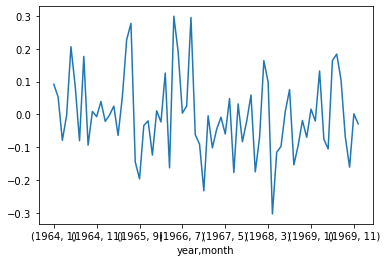

In [37]:
vals = xs['resid'].loc[(1964, 1):]
vals.plot()

In [38]:
# Now we move on to our illiquidity sorted portfolios. For now lets just do the portfolio sorted by illiquidity value rather than it and the variance and cap sorted portfolios

In [39]:
# Again, copy our new dataframe to maintain its integrity
df_AMEX_NYSE_non_market = df_AMEX_NYSE

In [40]:
# We are only working with data from 1963 now so we drop any data from 1962
df_AMEX_NYSE_non_market = df_AMEX_NYSE_non_market.drop(1962, level=1)

In [41]:
# We remove any stock with beginning of the year price outside the range of (5, 1000)
rows_to_delete_on_price = []

df_AMEX_NYSE_grouped = df_AMEX_NYSE_non_market.groupby(['PERMNO', 'year'])
for (name, year), group in df_AMEX_NYSE_grouped:
    row_one = group.iloc[0]
    if (5 <= row_one['PRC'] <= 1000) == False:
        rows_to_delete_on_price.append((name, year))

# We drop them from our main dataframe. This will help us form the new portfolios shortly
index_names = df_AMEX_NYSE_non_market.index.names[:2]
df_AMEX_NYSE_non_market = df_AMEX_NYSE_non_market.reset_index().set_index(index_names)
df_AMEX_NYSE_non_market = df_AMEX_NYSE_non_market.drop(index=rows_to_delete_on_price)

In [42]:
# We return the market caps as we will need them shortly for portfolio sorting. This time the caps are based on yearly caps
AMEX_NYSE_yearly_caps = []
new_index = []

df_AMEX_NYSE_grouped = df_AMEX_NYSE_non_market.groupby(['PERMNO', 'year'])
for (name, year), group in df_AMEX_NYSE_grouped:
    row_one = group.iloc[0]
    new_index.append((name, year))
    AMEX_NYSE_yearly_caps.append(row_one)

df_AMEX_NYSE_non_market_yearly_caps = pd.DataFrame(AMEX_NYSE_yearly_caps, index=new_index, columns=df_AMEX_NYSE_non_market.columns)

In [43]:
# Now we have a dataframe with just the first data of each month for each year for each stock
df_AMEX_NYSE_non_market_yearly_caps.index = pd.MultiIndex.from_tuples(df_AMEX_NYSE_non_market_yearly_caps.index, names=['PERMNO', 'year'])

In [44]:
# Get the number of valid observation days in each month
df_valid_obs_days = df_AMEX_NYSE_non_market.groupby(level=['PERMNO', 'year'])['date'].count()
df_valid_obs_days.to_frame()

# Now find annual illiquidity of all stocks
# Begin by finding daily illquidity of all stocks

# Create a column of ratio of return to dollar volume. On the days where volume is zero, do we still include that day as a valid observation day? 
# We cant divide by zero so we have to set that value to 0 in the sum rather than +/- inf
df_AMEX_NYSE_non_market['ILLIQUIDITY'] = np.abs(df_AMEX_NYSE_non_market['RET']) / df_AMEX_NYSE_non_market['DOLLAR VOL']
df_AMEX_NYSE_non_market['ILLIQUIDITY'] = df_AMEX_NYSE_non_market['ILLIQUIDITY'].fillna(0)
df_AMEX_NYSE_non_market['ILLIQUIDITY'] = df_AMEX_NYSE_non_market['ILLIQUIDITY'].replace([np.inf, -np.inf], 0)

# Create a series with just the illiquidity sum for each valid year
df_illiquidity_sum = df_AMEX_NYSE_non_market.groupby(['PERMNO', 'year'])['ILLIQUIDITY'].sum()
df_illiquidity_var = df_AMEX_NYSE_non_market.groupby(['PERMNO', 'year'])['ILLIQUIDITY'].var()
df_illiquidity_sum.to_frame()
df_illiquidity_var = df_illiquidity_var.to_frame()

In [45]:
# We can now compute illiquidity values for each stock for each year
df_illiquidity_non_market = df_illiquidity_sum.div(df_valid_obs_days, level=0)

df_illiquidity_non_market = df_illiquidity_non_market.to_frame()
df_illiquidity_non_market = df_illiquidity_non_market.rename(columns={0: 'ILLIQUIDITY'})

# Each year's liquidity value is actually the previous full year's, as we are sorting based on year t - 1, so we shift the dataframe
df_illiquidity_non_market = df_illiquidity_non_market.shift()
df_illiquidity_non_market_var = df_illiquidity_var.shift()

In [46]:
# The paper only uses stocks for which they have at least 100 days in the last year of valid values
rows_to_delete_too_few_obs = []

for (name, year) in df_valid_obs_days.index:
    current_row_num = df_valid_obs_days.index.get_loc((name, year))
    if (current_row_num == 0):
        rows_to_delete_too_few_obs.append((name, year))
    else:
        row_num_minus_one = current_row_num - 1
        row_num_minus_one_name = df_valid_obs_days.index[row_num_minus_one][0]
        row_num_minus_one_days = df_valid_obs_days.iloc[row_num_minus_one]

        if (name == row_num_minus_one_name):
            if (row_num_minus_one_days < 100):
                rows_to_delete_too_few_obs.append((name, year))
        else:
            rows_to_delete_too_few_obs.append((name, year))

# We drop them from our main dataframe as well. This will help us form the market portfolio shortly
df_illiquidity_non_market = df_illiquidity_non_market.drop(index=rows_to_delete_too_few_obs)
df_illiquidity_non_market_var = df_illiquidity_non_market_var.drop(index=rows_to_delete_too_few_obs)

In [47]:
df_illiquidity_non_market #this is yearly illiquidity, we also need monthly now

ILLIQUIDITY
PERMNO year             
10006  1964     0.093710
       1965     0.065199
       1966     0.042041
       1967     0.060421
       1968     0.055124
...                  ...
86239  1965     0.154804
       1966     0.110522
       1967     0.204352
       1968     0.097215
       1969     0.114312

[11217 rows x 1 columns]

In [48]:
# Group the dataframe by years
df_illiquidity_non_market_year_group = df_illiquidity_non_market.groupby('year')
df_illiquidity_non_market_var_year_group = df_illiquidity_non_market_var.groupby('year')
df_AMEX_NYSE_non_market_yearly_caps_group = df_AMEX_NYSE_non_market_yearly_caps.groupby('year')

In [49]:
# Now we sort into the correct portfolios
# create an empty list to store the split dataframes
df_non_market_increasing_yearly_illiquidity_portfolios = []

# loop over each group
for name, group in df_illiquidity_non_market_year_group:
    # sort the group
    sorted_group = group.sort_values('ILLIQUIDITY')
    # divide the sorted group into 25 equal parts
    split_group = np.array_split(sorted_group, 25)
    # append the split group to the list of split dataframes
    df_non_market_increasing_yearly_illiquidity_portfolios += split_group

In [50]:
# We need to find the return of the portfolio for each month t. We assume equal weights for now but can amend later if need be.
# First step is to gather the data into year, month combinations
# We also return the market caps as we will need them shortly for illiquidity calcs
AMEX_NYSE_monthly_prices = []
AMEX_NYSE_monthly_caps = []
new_index = []

df_AMEX_NYSE_non_market = df_AMEX_NYSE_non_market.reset_index().set_index(['PERMNO', 'year', 'month'])
df_AMEX_NYSE_grouped = df_AMEX_NYSE_non_market.groupby(['PERMNO', 'year', 'month'])
for (name, year, month), group in df_AMEX_NYSE_grouped:
    row_one = group.iloc[0]
    row_last = group.iloc[len(group) - 1]
    new_index.append((name, year, month))
    AMEX_NYSE_monthly_prices.append(row_one)
    AMEX_NYSE_monthly_caps.append(row_last)

df_AMEX_NYSE_non_market_monthly_prices = pd.DataFrame(AMEX_NYSE_monthly_prices, index=new_index, columns=df_AMEX_NYSE_non_market.columns)
df_AMEX_NYSE_non_market_monthly_caps = pd.DataFrame(AMEX_NYSE_monthly_caps, index=new_index, columns=df_AMEX_NYSE_non_market.columns)

In [51]:
# Now we have a dataframe with just the first data of each month for each year for each stock
df_AMEX_NYSE_non_market_monthly_prices.index = pd.MultiIndex.from_tuples(df_AMEX_NYSE_non_market_monthly_prices.index, names=['PERMNO', 'year', 'month'])

# Now we have a dataframe with just the last data of each month for each year for each stock
df_AMEX_NYSE_non_market_monthly_caps.index = pd.MultiIndex.from_tuples(df_AMEX_NYSE_non_market_monthly_caps.index, names=['PERMNO', 'year', 'month'])

# Get each stock's monthly return
df_AMEX_NYSE_non_market_monthly_prices['MONTHLY RETURNS'] = df_AMEX_NYSE_non_market_monthly_prices.groupby(['PERMNO'])['PRC'].pct_change()

In [52]:
# We now have to repeat this proceedure for the adjusted illiquidity values c. To do this we bring over the functions used in the other ipynb. Note: the calculation for adjusted illiquidity takes a very long time

# Now we get monthly market cap ratios as defined in the paper
df_AMEX_NYSE_non_market_monthly_portfolio_caps = df_AMEX_NYSE_non_market_monthly_caps.groupby(['year', 'month'])

monthly_portfolio_caps = []
new_index = []

for (year, month), group in df_AMEX_NYSE_non_market_monthly_portfolio_caps:
    new_index.append((year, month))
    col = group['MKT CAP']
    L = len(col)
    cap = col.values/L
    cap = np.nansum(cap)
    monthly_portfolio_caps.append(cap)

df_AMEX_NYSE_non_market_monthly_portfolio_caps = pd.DataFrame(monthly_portfolio_caps, index=new_index, columns=['CAP'])

In [53]:
# Now we have the market portfolio monthly caps by equal weight
df_AMEX_NYSE_non_market_monthly_portfolio_caps.index = pd.MultiIndex.from_tuples(df_AMEX_NYSE_non_market_monthly_portfolio_caps.index, names=['year', 'month'])

In [54]:
# We now need the cap ratios to the cap of July 1962
#base = df_AMEX_NYSE_monthly_portfolio_caps.loc[('1962', '07'), 'CAP']
base = 0.19308631191927988
df_AMEX_NYSE_non_market_monthly_portfolio_caps['RATIO'] = df_AMEX_NYSE_non_market_monthly_portfolio_caps['CAP'] / base

In [55]:
# Now find market portfolio illiquidity
# Begin by finding daily illquidity of all stocks

# Get the number of valid observation days in each month. Have to do this again as a number of stocks were dropped when we last used this method
df_valid_obs_days = df_AMEX_NYSE_non_market.groupby(level=['PERMNO', 'year', 'month'])['date'].count()
df_valid_obs_days.to_frame()

# Create a series with just the illiquidity sum for each valid month
df_illiquidity_sum = df_AMEX_NYSE_non_market.groupby(['PERMNO', 'year', 'month'])['ILLIQUIDITY'].sum()
df_illiquidity_sum.to_frame()

ILLIQUIDITY
PERMNO year month             
10006  1963 1         1.051732
            2         1.152710
            3         1.406984
            4         1.942196
            5         1.524969
...                        ...
86239  1969 8        10.724778
            9         8.830032
            10       19.983544
            11       16.214974
            12       29.183556

[165135 rows x 1 columns]

In [56]:
# We can now compute illiquidity values for each stock for each month of each year
df_non_market_illiquidity = df_illiquidity_sum.div(df_valid_obs_days, level=0)

df_non_market_illiquidity = df_non_market_illiquidity.to_frame()
df_non_market_illiquidity = df_non_market_illiquidity.rename(columns={0: 'ILLIQUIDITY'})

In [62]:
# Now we can find the illiquidity adjustments c as described in the paper
# To do so we first combine our illiquidity and cap dataframe so that each stock for each month of each year is multiplied by the correct ratio from the cap dataframe

df_non_market_illiquidity['ADJUSTED ILLIQUIDITY'] = np.zeros(len(df_non_market_illiquidity))

for index in df_non_market_illiquidity.index:
    pos = index[1:3]

    if (pos == (1962, 7)):
        df_non_market_illiquidity.loc[index, 'ADJUSTED ILLIQUIDITY'] = df_non_market_illiquidity.loc[index, 'ILLIQUIDITY']
    else:
        i = df_AMEX_NYSE_non_market_monthly_portfolio_caps.index.get_loc(pos)
        ratio = df_AMEX_NYSE_non_market_monthly_portfolio_caps.iloc[i - 1, 1]
        df_non_market_illiquidity.loc[index, 'ADJUSTED ILLIQUIDITY'] = df_non_market_illiquidity.loc[index, 'ILLIQUIDITY'] * ratio

# Now we can compute c
df_non_market_illiquidity['c'] = np.minimum(0.25 + 0.3 * df_non_market_illiquidity['ADJUSTED ILLIQUIDITY'], 30.)


In [240]:
'''# Save the file
df_non_market_illiquidity.to_csv('Data/AMEX_NYSE_daily_illiquidity_non_market.csv')

'''# Takes a long time so just read in instead
#df_non_market_illiquidity = pd.read_csv('Data/AMEX_NYSE_daily_illiquidity_non_market.csv', index_col=['PERMNO', 'year', 'month'])

In [63]:
df_AMEX_NYSE_non_market_monthly_portfolio_caps['ADJUSTED RATIO'] = (30. - 0.25) / (0.3 * df_AMEX_NYSE_non_market_monthly_portfolio_caps['RATIO'].shift(1))

In [64]:
df_non_market_illiquidity

ILLIQUIDITY  ADJUSTED ILLIQUIDITY         c
PERMNO year month                                             
10006  1963 1         0.047806              0.068885  0.270666
            2         0.060669              0.069064  0.270719
            3         0.066999              0.074285  0.272286
            4         0.092486              0.105543  0.281663
            5         0.069317              0.082678  0.274803
...                        ...                   ...       ...
86239  1969 8         0.510704              0.723609  0.467083
            9         0.420478              0.621328  0.436398
            10        0.868850              1.249442  0.624833
            11        0.853420              1.291154  0.637346
            12        1.326525              1.929134  0.828740

[165135 rows x 3 columns]

In [65]:
# We need to compute the returns and illiquidity c values for each portfolio 
# Start with the increasing illiquidity portfolio
# The structure is dictionary with key = year and value = dictionary. This second dictionary has key = the portfolio number and value = dataframe of monthly returns
df_non_market_increasing_yearly_illiquidity_portfolios_returns = {}
i = 0

for portfolio in df_non_market_increasing_yearly_illiquidity_portfolios:
    # For each portfolio get its position in the order and year
    portfolio_number = i % 25
    portfolio_year = portfolio.index[0][1]
    
    # If this is the first portfolio make a dictionary to save the portfolio numbers and their dataframes
    if i == 0:
        dictionary_for_portfolio_year = {}
    
    # Get monthly returns and add to dictionary 
    portfolio_stocks = list(portfolio.index.get_level_values(level=0))
    portfolio_monthly_returns = df_AMEX_NYSE_non_market_monthly_prices.xs(portfolio_year, level=1)
    portfolio_monthly_returns = portfolio_monthly_returns.loc[portfolio_stocks]
    
    # Groupby month and calculate monthly returns for each stock in portfolio before summing and averaging
    portfolio_monthly_returns = portfolio_monthly_returns.groupby(['month'])
    new_index = []
    rets = []

    for (month), group in portfolio_monthly_returns:
        new_index.append(int(month))
        col = group['MONTHLY RETURNS']
        L = len(col)
        ret = col.values/L
        ret = np.nansum(ret, axis=0)
        rets.append(ret)
    
    # Do the same for mkt caps
    portfolio_monthly_caps = df_AMEX_NYSE_non_market_monthly_caps.xs(portfolio_year, level=1)
    portfolio_monthly_caps = portfolio_monthly_caps.loc[portfolio_stocks]
    
    # Groupby month and calculate monthly returns for each stock in portfolio before summing and averaging
    portfolio_monthly_caps = portfolio_monthly_caps.groupby(['month'])
    #new_index = []
    caps = []

    for (month), group in portfolio_monthly_caps:
        #new_index.append(int(month))
        col = group['MKT CAP']
        L = len(col)
        cap = col.values/L
        cap = np.nansum(cap, axis=0)
        caps.append(cap)

    # Get monthly c and add to dictionary 
    portfolio_monthly_c = df_non_market_illiquidity.xs(portfolio_year, level=1)
    portfolio_monthly_c = portfolio_monthly_c.loc[portfolio_stocks]
    
    # Groupby month and calculate monthly c for each stock in portfolio before summing and averaging
    portfolio_monthly_c = portfolio_monthly_c.groupby(['month'])
    #new_index = []
    cs = []

    for (month), group in portfolio_monthly_c:
        #new_index.append(int(month))
        col = group['c']
        L = len(col)
        c = col.values/L
        c = np.nansum(c, axis=0)
        cs.append(c)
    
    #new_index = []
    bars = []
    for (month), group in portfolio_monthly_c:
        #new_index.append(int(month))
        adjusted_ratio = df_AMEX_NYSE_non_market_monthly_portfolio_caps.loc[(year, month), 'ADJUSTED RATIO']
        col = group['ILLIQUIDITY']
        L = len(col)
        adjusted_ratio_arr = np.ones(L) * adjusted_ratio

        # Compare the arrays to find the minimum of the adjusted ratio and the illiquidity
        unnormalized_illiquidities = np.minimum(col.values, adjusted_ratio_arr)
        bar = col.values/L
        bar = np.nansum(bar, axis=0)
        bars.append(bar)

    # We now need the cap ratios to the cap of July 1962
    #base = df_AMEX_NYSE_monthly_portfolio_caps.loc[('1962', '07'), 'CAP']
    base = 0.19308631191927988
    
    # Make a dataframe of monthly returns and add to dictionary with key of the portfolio number
    df_portfolio_for_current_year = pd.DataFrame(rets, index=new_index, columns=['RET'])
    df_portfolio_for_current_year['CAP'] = caps
    df_portfolio_for_current_year['RATIO'] = df_portfolio_for_current_year['CAP'] / base
    df_portfolio_for_current_year['c'] = cs
    df_portfolio_for_current_year['ILLIQ_bar'] = bars
    dictionary_for_portfolio_year[portfolio_number] = df_portfolio_for_current_year

    if portfolio_number == 24 and i != 0:
        # If we have reached 25 portfolios then we are in a new year again so we add the dictionary of the portfolio number : dataframe of monthly returns to the overall dictionary
        # We then start again with a new year
        df_non_market_increasing_yearly_illiquidity_portfolios_returns[int(portfolio_year)] = dictionary_for_portfolio_year
        dictionary_for_portfolio_year = {}

    i += 1


In [66]:
df_non_market_increasing_yearly_illiquidity_portfolios_returns[1964][0]

,RET,CAP,RATIO,c,ILLIQ_bar
1,0.016104,3.172536,16.430662,0.254995,0.013318
2,-0.013964,3.216404,16.657859,0.255084,0.013237
3,0.012111,3.258614,16.876465,0.255031,0.012941
4,-0.001761,3.288644,17.031991,0.257233,0.018327
5,0.007045,3.333760,17.265649,0.256673,0.016843
6,-0.005039,3.380452,17.507468,0.257555,0.018927
7,0.008302,3.427170,17.749421,0.257718,0.019120
8,0.000975,3.363402,17.419165,0.259738,0.023761
9,-0.004772,3.460288,17.920941,0.256885,0.017069
10,0.026766,3.480551,18.025884,0.258468,0.020503


In [67]:
df_all_portfolios = pd.DataFrame.from_dict(df_non_market_increasing_yearly_illiquidity_portfolios_returns)

In [68]:
df_all_portfolios

,1964,1965,1966,1967,1968,1969
0,RET CAP RATIO c I...,RET CAP RATIO c I...,RET CAP RATIO c I...,RET CAP RATIO c I...,RET CAP RATIO c I...,RET CAP RATIO c I...
1,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...
2,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...
3,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...
4,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...
5,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...
6,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...
7,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...
8,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...
9,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...,RET CAP RATIO c IL...


In [96]:
data=row_one.loc[row_one.index[0]]
data.values

array([         RET       CAP      RATIO         c  ILLIQ_bar
       1   0.016104  3.172536  16.430662  0.254995   0.013318
       2  -0.013964  3.216404  16.657859  0.255084   0.013237
       3   0.012111  3.258614  16.876465  0.255031   0.012941
       4  -0.001761  3.288644  17.031991  0.257233   0.018327
       5   0.007045  3.333760  17.265649  0.256673   0.016843
       6  -0.005039  3.380452  17.507468  0.257555   0.018927
       7   0.008302  3.427170  17.749421  0.257718   0.019120
       8   0.000975  3.363402  17.419165  0.259738   0.023761
       9  -0.004772  3.460288  17.920941  0.256885   0.017069
       10  0.026766  3.480551  18.025884  0.258468   0.020503
       11  0.002502  3.419535  17.709875  0.257801   0.018729
       12 -0.025929  3.484294  18.045268  0.261694   0.028333],
      dtype=object)

In [105]:
col.values

array([ 3.07254609,  5.17363132,  2.89199022,  2.00148846,  3.77395426,
        6.87439133,  0.65144768,  4.11457594,  4.4274943 ,  2.73855608,
        2.61066472,  5.15548682,  4.83723744,  0.47804122,  2.68349474,
        2.40708275,  7.67412005,  3.21589971,  0.08064719,  6.86847274,
        2.75499917,  2.64682161,  4.77212678,  5.12043459,  0.9511385 ,
        6.49493265,  3.74309583,  3.59915122,  1.3260681 ,  2.52681045,
        6.36859987,  2.36015054,  3.75673337,  5.50421477,  3.70132347,
        5.71327089,  7.09535601,  6.36006474,  8.00444536,  6.3738553 ,
        3.56067703,  2.05130812,  7.77957977, 14.99531689,  8.20900304,
        7.32312156,  6.81449737, 13.87133679, 12.24505422, 19.20653504,
        3.32321096,  1.35191161,  4.01142114,  2.33660205, 16.26967073,
       18.15590283,  4.53426724, 22.08384964, 35.7605435 , 23.89785825,
        9.06734595,  2.81463752,  0.        ,  6.65388241,  2.64377241,
        7.01069864, 16.95500112,  6.49101894,  7.69549536,  2.98

In [84]:
# Create a new DataFrame to store the extracted values
new_df = pd.DataFrame()

# Loop over the columns of the original DataFrame
row_one = df_all_portfolios.iloc[0]
row_one = row_one.to_frame()
for idx in row_one.index:
    # Extract the values from the column
    data = row_one.loc[idx]
    print(data.values)
    # Set the column name as the index of the extracted values
    data.index = pd.MultiIndex.from_product([[col], data.index])
    # Add the extracted values to the new DataFrame
    new_df = pd.concat([new_df, data.values], axis=0)


[         RET       CAP      RATIO         c  ILLIQ_bar
 1   0.016104  3.172536  16.430662  0.254995   0.013318
 2  -0.013964  3.216404  16.657859  0.255084   0.013237
 3   0.012111  3.258614  16.876465  0.255031   0.012941
 4  -0.001761  3.288644  17.031991  0.257233   0.018327
 5   0.007045  3.333760  17.265649  0.256673   0.016843
 6  -0.005039  3.380452  17.507468  0.257555   0.018927
 7   0.008302  3.427170  17.749421  0.257718   0.019120
 8   0.000975  3.363402  17.419165  0.259738   0.023761
 9  -0.004772  3.460288  17.920941  0.256885   0.017069
 10  0.026766  3.480551  18.025884  0.258468   0.020503
 11  0.002502  3.419535  17.709875  0.257801   0.018729
 12 -0.025929  3.484294  18.045268  0.261694   0.028333]


TypeError: unhashable type: 'Series'

In [83]:
row_one.index

Int64Index([1964, 1965, 1966, 1967, 1968, 1969], dtype='int64')

In [258]:
'''# We need to compute the returns and illiquidity c values for each portfolio 
# Start with the increasing illiquidity portfolio
# The structure is dictionary with key = year and value = dictionary. This second dictionary has key = the portfolio number and value = dataframe of monthly c
df_non_market_increasing_yearly_illiquidity_portfolios_c = {}
i = 0

for portfolio in df_non_market_increasing_yearly_illiquidity_portfolios:
    # For each portfolio get its position in the order and year
    portfolio_number = i % 25
    portfolio_year = portfolio.index[0][1]
    
    # If this is the first portfolio make a dictionary to save the portfolio numbers and their dataframes
    if i == 0:
        dictionary_for_portfolio_year = {}

    # Get monthly c and add to dictionary 
    portfolio_stocks = list(portfolio.index.get_level_values(level=0))
    portfolio_monthly_c = df_non_market_illiquidity.xs(portfolio_year, level=1)
    portfolio_monthly_c = portfolio_monthly_c.loc[portfolio_stocks]
    
    # Groupby month and calculate monthly c for each stock in portfolio before summing and averaging
    portfolio_monthly_c = portfolio_monthly_c.groupby(['month'])
    new_index = []
    cs = []

    for (month), group in portfolio_monthly_c:
        new_index.append(int(month))
        col = group['c']
        L = len(col)
        c = col.values/L
        c = np.nansum(c, axis=0)
        cs.append(c)
    
    # Make a dataframe of monthly c and add to dictionary with key of the portfolio number
    df_portfolio_for_current_year = pd.DataFrame(cs, index=new_index, columns=['c'])
    dictionary_for_portfolio_year[portfolio_number] = df_portfolio_for_current_year

    if portfolio_number == 24 and i != 0:
        # If we have reached 25 portfolios then we are in a new year again so we add the dictionary of the portfolio number : dataframe of monthly c to the overall dictionary
        # We then start again with a new year
        df_non_market_increasing_yearly_illiquidity_portfolios_c[int(portfolio_year)] = dictionary_for_portfolio_year
        dictionary_for_portfolio_year = {}

    i += 1'''


In [107]:
# We need the average illiquidity for each portfoilio in each year. Then we will use these averages per year to calculate an average for the entire period of 1964-1999 for each portfolio
df_non_market_for_portfolio_average_c = pd.DataFrame()
portfolio_numbers = list(range(0, 25))

for year in df_non_market_increasing_yearly_illiquidity_portfolios_returns:
    current_year_dictionary = df_non_market_increasing_yearly_illiquidity_portfolios_returns[year]
    current_year_array = np.ones(25)*year
    current_year_values = []

    for num in current_year_dictionary:
        current_year_num_portfolio = current_year_dictionary[num]
        average = current_year_num_portfolio['c'].mean()
        current_year_values.append(average)

    df_for_current_year_portfolio_average_c = pd.DataFrame(current_year_values, columns=['average c'])
    df_for_current_year_portfolio_average_c['year'] = current_year_array
    df_for_current_year_portfolio_average_c['number'] = portfolio_numbers
    df_for_current_year_portfolio_average_c = df_for_current_year_portfolio_average_c.set_index(['year', 'number'])

    df_non_market_for_portfolio_average_c = pd.concat([df_non_market_for_portfolio_average_c, df_for_current_year_portfolio_average_c], axis=0, join='outer')

        

In [108]:
df_non_market_for_portfolio_average_c

average c
year   number           
1964.0 0        0.257406
       1        0.262858
       2        0.268393
       3        0.277740
       4        0.289413
...                  ...
1969.0 20       0.876660
       21       1.050311
       22       1.216514
       23       1.397034
       24       2.268372

[150 rows x 1 columns]

In [109]:
df_non_market_for_portfolio_average_c_grouped = df_non_market_for_portfolio_average_c.groupby(['number'])
overall_portfolio_average_c_values = []

for number, group in df_non_market_for_portfolio_average_c_grouped:
    col = group['average c']
    average = col.mean()
    overall_portfolio_average_c_values.append(average)

df_non_market_overall_portfolio_average_c = pd.DataFrame(overall_portfolio_average_c_values, index=list(range(0, 25)), columns=['average c'])

In [110]:
df_non_market_overall_portfolio_average_c

,average c
0,0.256572
1,0.262304
2,0.268965
3,0.276001
4,0.286660
5,0.300378
6,0.312338
7,0.326358
8,0.348001
9,0.360094


In [113]:
df_AMEX_NYSE_non_market_monthly_portfolio_caps

CAP     RATIO  ADJUSTED RATIO
year month                                    
1963 1      0.219805  1.138375             NaN
     2      0.214084  1.108747       87.112505
     3      0.220346  1.141179       89.440271
     4      0.230305  1.192758       86.898408
     5      0.232003  1.201550       83.140628
...              ...       ...             ...
1969 8      0.285318  1.477671       69.989146
     9      0.277666  1.438041       67.110128
     10     0.292124  1.512918       68.959546
     11     0.280801  1.454276       65.546628
     12     0.278225  1.440938       68.189722

[84 rows x 3 columns]

In [111]:
#Now perform regression

#temp name for easy of reading
x=df_AMEX_NYSE_non_market_monthly_portfolio_caps

y=0.25+0.3*x['ILLIQ_bar']*x['RATIO'].shift(1)
x1=0.25+0.3*x['ILLIQ_bar'].shift(1)*x['RATIO'].shift(1)
x2=0.25+0.3*x['ILLIQ_bar'].shift(2)*x['RATIO'].shift(1)

y=y[2:] #remove observation with NA's in X

#now do regression
#(XTX)^-1(xTY)
x0=np.ones(x1.shape)
xs=pd.DataFrame(x0,columns=['x0'],index=x1.index)
xs['x1']=x1
xs['x2']=x2

xs=xs.dropna()

coefs=np.linalg.inv(xs.T@xs).dot(np.dot(xs.T,y)).T

KeyError: 'ILLIQ_bar'

In [215]:
#Now estimate residuals

xs['y_hat']=(xs*coefs).sum(axis=1)
xs['resid']=y-xs['y_hat']

<AxesSubplot:xlabel='year,month'>

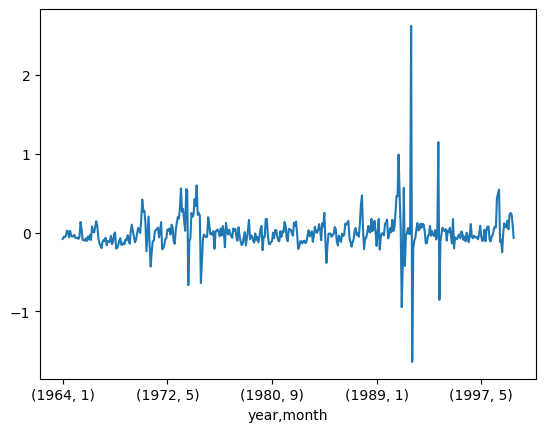

In [216]:
vals = xs['resid'].loc[(1964, 1):]
vals.plot()

Getting the residuals of $c_t^p-\mathbb{E}_{t-1}(c_t^p)$

In [358]:
#the above wasn't working for me df_AMEX_NYSE_non_market_monthly_portfolio_caps doesn't contain illiq_bar
portfolio_numbers = list(range(0, 25))
years=df_all_portfolios.loc[0].index
portfolio_c_residuals=pd.DataFrame([])
for n in portfolio_numbers:
    illiq_bar=np.array([])
    ratio=np.array([])
    for year in years:
        #get all illiq_bar for a single porftolio
        illiq_bar=np.concatenate((illiq_bar,df_all_portfolios.loc[n,year]['ILLIQ_bar'].values))
        ratio=np.concatenate((ratio,df_all_portfolios.loc[n,year]['RATIO'].values))
    #now perform regression for the portfolio
    x=pd.DataFrame({'ILLIQ_bar':illiq_bar,'RATIO':ratio})
    
    y=0.25+0.3*x['ILLIQ_bar']*x['RATIO'].shift(1)
    x1=0.25+0.3*x['ILLIQ_bar'].shift(1)*x['RATIO'].shift(1)
    x2=0.25+0.3*x['ILLIQ_bar'].shift(2)*x['RATIO'].shift(1)

    y=y[2:] #remove observation with NA's in X

    #now do regression
    #(XTX)^-1(xTY)
    x0=np.ones(x1.shape)
    xs=pd.DataFrame(x0,columns=['x0'],index=x1.index)
    xs['x1']=x1
    xs['x2']=x2

    xs=xs.dropna()

    coefs=np.linalg.inv(xs.T@xs).dot(np.dot(xs.T,y)).T
    
    xs['y_hat']=(xs*coefs).sum(axis=1)
    xs['resid']=y-xs['y_hat']
    portfolio_c_residuals[f'portfolio_{n+1}']=xs['resid']

### Beta calculations

First calculate the expression
$r_t^M-\mathbb{E}_{t-1}(r_t^M)$

In [326]:
regression_data=df_AMEX_NYSE_monthly_caps.groupby(['year','month']).sum()
#perform regression on market portfolio against itself one period earlier
x1=regression_data['MKT CAP'].shift(1)[1:].to_frame()
y=regression_data['MKT CAP'][1:]

#capm assumes intercept is 0
#consider as regressing y=r_t-1 on x=r_t-2 to avoid bias

coefs=np.linalg.inv(x1.T@x1).dot(np.dot(x1.T,y)).T

#now estimate residuals
# r_t vs E_t-1[r_t]
x1['y_hat']=x1*coefs #E_t-1[r_t]=B*r_t-1
x1['resid']=y.shift(-1)-x1['y_hat'] #r_t-b*r_t-1
market_portfolio_regression=x1

#missing last entry as this would require knowing the future market value I think

In [308]:
x1

MKT CAP       y_hat      resid
year month                                   
1962 8      332.522579  334.256752 -12.688849
     9      338.695287  340.461652 -18.851063
     10     321.567903  323.244946  31.035010
     11     321.610589  323.287854  35.679771
     12     354.279956  356.127598  21.368691
...                ...         ...        ...
1969 8      620.192082  623.426511  13.156345
     9      649.740199  653.128727  18.176290
     10     636.582855  639.902765   7.803205
     11     671.305017  674.806010 -32.271584
     12     647.705970  651.083889        NaN

[89 rows x 3 columns]

### Beta 1

In [312]:
market_portfolio_regression.loc[1964:,:]['resid'].values[:-1]

array([ 16.11014788,  12.11753409,   7.31752753,   7.56301424,
        12.50653998,  13.94811835,  -0.48941023,   3.85893988,
        14.98827449,  -2.24216956,  -0.23881815,  21.14361526,
        17.55319064,  -6.08219979,  10.04447199,  11.60403954,
       -34.0081091 , -22.06458956,  18.45190975,  25.97311494,
        28.20687813,  11.31791104,   7.37148291,  14.88740025,
        -4.13129577, -22.66009127,  -2.36983073, -21.01597491,
       -39.39808125, -15.57589555, -50.57805381, -47.8061213 ,
        12.07443268,  21.21951093,   9.23786343,  46.64093363,
        43.23470189,  24.57939941,  44.36415704,  -5.87213912,
       -15.92379913,  37.7096583 ,  17.62175822,   9.78580039,
        -2.3593255 , -19.6176581 ,  30.29380283,   2.96600071,
       -51.53862059, -22.63369536,  52.87443305,  64.24263822,
        18.41532722, -11.91956966, -10.00988319,  34.52724677,
        32.42141476,  41.74146402,  27.80403321, -14.91382591,
       -47.5578611 , -22.52733599,  32.81466824,  11.34

In [327]:
portfolio_numbers = list(range(0, 25))
years=df_all_portfolios.loc[0].index
beta1=np.zeros(len(portfolio_numbers))
#drop last values due to nan from market portfolio regression
market_portfolio_residuals=market_portfolio_regression.loc[1964:,:]['resid'].values[:-1]
market_c_residuals=market_c_regression.loc[1964:]['resid'].values[:-1]

for n in portfolio_numbers:
    market_caps=np.array([])
    for year in years:
        #get all market caps for a single porftolio
        market_caps=np.concatenate((market_caps,df_all_portfolios.loc[n,year]['CAP'].values))
    
    beta1[n]=np.cov(market_caps[:-1],market_portfolio_residuals)[0,1]/(np.var(market_portfolio_residuals-(market_c_residuals)))
    

In [328]:
beta1

array([-4.72859451e-04,  9.41833294e-04, -3.08028425e-05,  3.47053914e-04,
        1.41552326e-04, -6.69163344e-05,  1.48703901e-04, -5.83546998e-05,
        1.74592003e-04,  6.67203193e-05,  3.50575160e-06, -1.32463923e-04,
       -1.52745879e-05,  8.61022275e-06, -3.76474894e-05,  3.11789930e-05,
       -3.31610321e-06, -3.32715512e-05, -2.36113503e-05, -1.64035724e-04,
       -2.04596573e-05,  1.48926588e-05, -4.04884300e-05,  1.02003346e-05,
       -5.67759057e-05])

### Beta 2

In [378]:
portfolio_numbers = list(range(0, 25))
years=df_all_portfolios.loc[0].index
beta2=np.zeros(len(portfolio_numbers))
#drop last values due to nan from market portfolio regression
market_portfolio_residuals=market_portfolio_regression.loc[1964:,:]['resid'].values[1:-1]
market_c_residuals=market_c_regression.loc[1964:]['resid'].values[1:-1]


for n in portfolio_numbers:
    beta2[n]=np.cov(portfolio_c_residuals[f'portfolio_{(n+1)}'],market_c_residuals)[0,1]/(
        np.var(market_portfolio_residuals-market_c_residuals))
    

### Beta 3

In [380]:
portfolio_numbers = list(range(0, 25))
years=df_all_portfolios.loc[0].index
beta3=np.zeros(len(portfolio_numbers))
#drop last values due to nan from market portfolio regression
market_portfolio_residuals=market_portfolio_regression.loc[1964:,:]['resid'].values[:-1]
market_c_residuals=market_c_regression.loc[1964:]['resid'].values[:-1]


for n in portfolio_numbers:
    market_caps=np.array([])
    for year in years:
        #get all market caps for a single porftolio
        market_caps=np.concatenate((market_caps,df_all_portfolios.loc[n,year]['CAP'].values))
    
    beta3[n]=np.cov(market_caps[:-1],market_c_residuals)[0,1]/(
        np.var(market_portfolio_residuals-market_c_residuals))
    

### Beta 4

In [381]:
portfolio_numbers = list(range(0, 25))
years=df_all_portfolios.loc[0].index
beta4=np.zeros(len(portfolio_numbers))
#drop last values due to nan from market portfolio regression
market_portfolio_residuals=market_portfolio_regression.loc[1964:,:]['resid'].values[1:-1]
market_c_residuals=market_c_regression.loc[1964:]['resid'].values[1:-1]


for n in portfolio_numbers:
    beta4[n]=np.cov(portfolio_c_residuals[f'portfolio_{(n+1)}'],market_c_residuals)[0,1]/(
        np.var(market_portfolio_residuals-market_c_residuals))
 

In [392]:
beta_df=pd.DataFrame([beta1,beta2,beta3,beta4],columns=[f'portfolio_{i}' for i in range(1,26)])
beta_df=beta_df.T
beta_df.columns=['beta_1','beta_2','beta_3','beta_4']
beta_df

,beta_1,beta_2,beta_3,beta_4
portfolio_1,-0.000473,4.513211e-07,-8.126897e-06,4.513211e-07
portfolio_2,0.000942,4.954663e-08,-5.434223e-06,4.954663e-08
portfolio_3,-0.000031,-2.663773e-08,-2.815221e-06,-2.663773e-08
portfolio_4,0.000347,1.299584e-07,-3.303150e-06,1.299584e-07
portfolio_5,0.000142,1.098865e-07,-2.525198e-06,1.098865e-07
portfolio_6,-0.000067,-5.033625e-08,-9.056219e-07,-5.033625e-08
portfolio_7,0.000149,-7.631288e-08,-2.023917e-06,-7.631288e-08
portfolio_8,-0.000058,2.720179e-08,-1.391090e-06,2.720179e-08
portfolio_9,0.000175,8.112558e-07,-8.516945e-07,8.112558e-07
portfolio_10,0.000067,6.606453e-08,-1.209465e-06,6.606453e-08
